# EDA & Images

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [16]:
df = pd.read_csv('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/final_df.csv')
df.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,image_url,current_club_domestic_competition_id,current_club_name,club_id,club_code,name_y,domestic_competition_id,competition_id,type,country_name
0,0,Adama Diakhaby,fr FRA,"FW,MF",Monaco,fr Ligue 1,21,1996,22,10,...,https://img.a.transfermarkt.technology/portrai...,GB1,Huddersfield Town,1110,huddersfield-town,Huddersfield Town,GB1,GB1,domestic_league,England
1,1,Adrien Hunou,fr FRA,"FW,MF",Rennes,fr Ligue 1,23,1994,24,17,...,https://img.a.transfermarkt.technology/portrai...,FR1,Angers SCO,1420,sco-angers,Angers SCO,FR1,FR1,domestic_league,France
2,2,Ahmad Benali,ly LBY,MF,Crotone,it Serie A,25,1992,10,10,...,https://img.a.transfermarkt.technology/portrai...,IT1,FC Crotone,4083,fc-crotone,FC Crotone,IT1,IT1,domestic_league,Italy
3,3,Alberto Paloschi,it ITA,FW,SPAL,it Serie A,27,1990,36,25,...,https://img.a.transfermarkt.technology/portrai...,IT1,Cagliari Calcio,1390,cagliari-calcio,Cagliari Calcio,IT1,IT1,domestic_league,Italy
4,4,Albin Ekdal,se SWE,MF,Hamburger SV,de Bundesliga,28,1989,19,12,...,https://img.a.transfermarkt.technology/portrai...,IT1,Spezia Calcio,3522,spezia-calcio,Spezia Calcio,IT1,IT1,domestic_league,Italy


## Exploratory Data Analysis

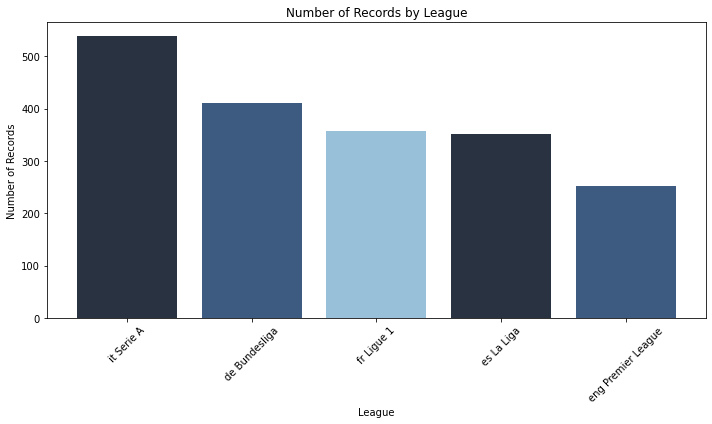

In [65]:
####### Count per League

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of records for each league
league_counts = df['Comp'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(league_counts.index, league_counts.values, color=['#293241', '#3d5a80', '#98c1d9'])
plt.xlabel('League')
plt.ylabel('Number of Records')
plt.title('Number of Records by League')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


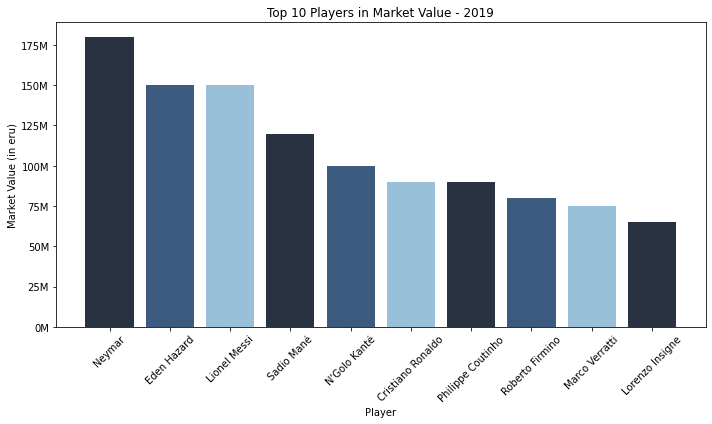

In [92]:
################ TOP Players

# Filter data for the year 2019
df_2019 = df[df['date'] == 2019]

# Find top 10 players based on market value for the year 2019
top_players_2019 = df_2019.nlargest(10, 'market_value_in_eur')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_players_2019['Player'], top_players_2019['market_value_in_eur'], color=['#293241', '#3d5a80', '#98c1d9'])
plt.xlabel('Player')
plt.ylabel('Market Value (in eru)')
plt.title('Top 10 Players in Market Value - 2019')
plt.xticks(rotation=45)

# Apply millions formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show plot for the year 2019
plt.tight_layout()
plt.savefig('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/Images/top10players.png')
plt.show()

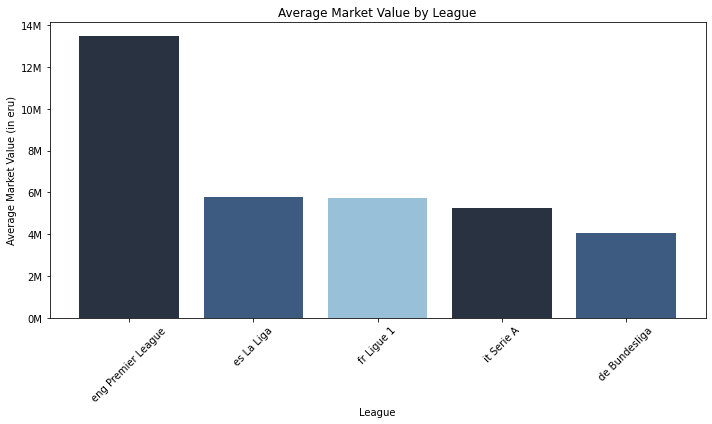

In [46]:
# Calculate average market value for each league
avg_market_values = df.groupby('Comp')['market_value_in_eur'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_market_values.index, avg_market_values.values, color=['#293241', '#3d5a80', '#98c1d9'])
plt.xlabel('League')
plt.ylabel('Average Market Value (in eru)')
plt.title('Average Market Value by League')
plt.xticks(rotation=45)

# Apply millions formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show plot
plt.tight_layout()
plt.show()

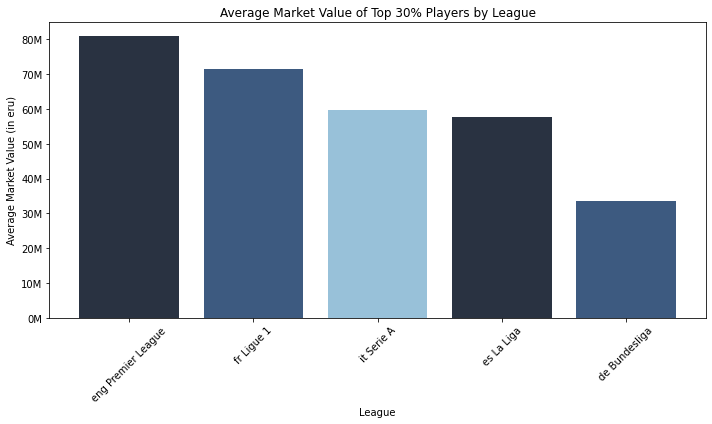

In [59]:
# Calculate the top 30% market value for each league
top_30_percent = df.groupby('Comp')['market_value_in_eur'].quantile(0.97)

# Filter data for players with market value greater than or equal to top 30% for each league
top_players = df[df.apply(lambda x: x['market_value_in_eur'] >= top_30_percent[x['Comp']], axis=1)]

# Calculate the average market value for the top 30% players in each league
avg_market_values = top_players.groupby('Comp')['market_value_in_eur'].mean().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_market_values.index, avg_market_values.values, color=['#293241', '#3d5a80', '#98c1d9'])
plt.xlabel('League')
plt.ylabel('Average Market Value (in eru)')
plt.title('Average Market Value of Top 30% Players by League')
plt.xticks(rotation=45)

# Apply millions formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show plot
plt.tight_layout()
plt.show()

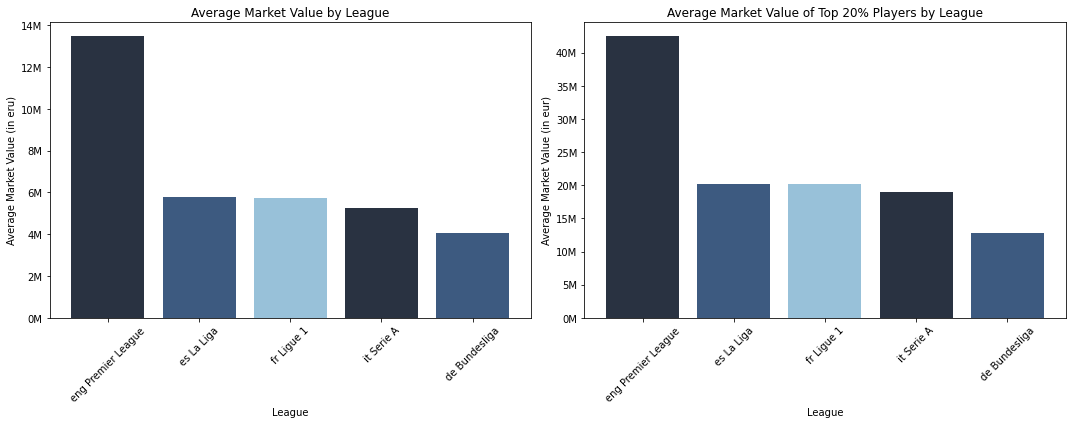

In [85]:
# Calculate average market value for each league
avg_market_values = df.groupby('Comp')['market_value_in_eur'].mean().sort_values(ascending=False)

# Calculate the top 30% market value for each league
top_30_percent = df.groupby('Comp')['market_value_in_eur'].quantile(0.8)

# Filter data for players with market value greater than or equal to top 30% for each league
top_players = df[df.apply(lambda x: x['market_value_in_eur'] >= top_30_percent[x['Comp']], axis=1)]

# Calculate the average market value for the top 30% players in each league
avg_market_values_top_30 = top_players.groupby('Comp')['market_value_in_eur'].mean().sort_values(ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the bar chart for average market value by league
axes[0].bar(avg_market_values.index, avg_market_values.values, color=['#293241', '#3d5a80', '#98c1d9'])
axes[0].set_xlabel('League')
axes[0].set_ylabel('Average Market Value (in eru)')
axes[0].set_title('Average Market Value by League')
axes[0].tick_params(axis='x', rotation=45)
axes[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Plotting the bar chart for average market value of top 30% players by league
axes[1].bar(avg_market_values_top_30.index, avg_market_values_top_30.values, color=['#293241', '#3d5a80', '#98c1d9'])
axes[1].set_xlabel('League')
axes[1].set_ylabel('Average Market Value (in eur)')
axes[1].set_title('Average Market Value of Top 20% Players by League')
axes[1].tick_params(axis='x', rotation=45)
axes[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Adjust layout
plt.tight_layout()

plt.savefig('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/Images/average_market_values_per_league.png')
# Show plot
plt.show()

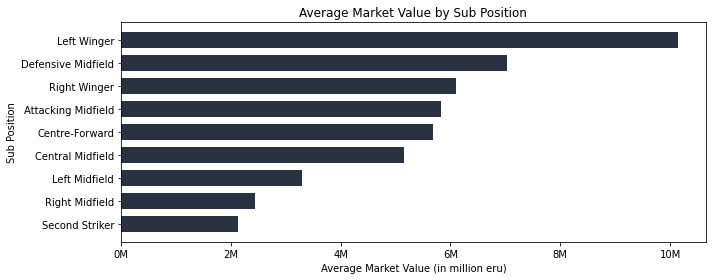

In [86]:
# Calculate average market value for each sub_position
avg_market_values_sub_position = df.groupby('sub_position')['market_value_in_eur'].mean().sort_values()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 4))
plt.barh(avg_market_values_sub_position.index, avg_market_values_sub_position.values, color='#293241', height=0.7)
plt.xlabel('Average Market Value (in million eru)')
plt.ylabel('Sub Position')
plt.title('Average Market Value by Sub Position')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}M'.format(x / 1e6)))
plt.tight_layout()

# Show plot
plt.savefig('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/Images/value_per_position.png')
plt.show()

## Correlations with target Variable

In [104]:
# Calculate correlation between each feature and market value
correlation = df.corr()['market_value_in_eur'].abs().sort_values(ascending=False)

# Extract top 5 correlated features
top_contributors = correlation[1:11]  # Exclude market value itself

# Print the top contributors
print("Top 12 Correlated Features with Market Value:")
print(top_contributors)

top_contributors.to_excel('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/Images/correlation_gen.xlsx')



/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_52880/310970310.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['market_value_in_eur'].abs().sort_values(ascending=False)


Top 12 Correlated Features with Market Value:
ThruBalls            0.572945
ProgCarries          0.567267
GCA                  0.567214
GCAPassLive          0.555344
PenAreaCmp           0.547783
CarriesToFinal3rd    0.535508
Att3rdTouch          0.535358
npxG+xA              0.526606
SCAPassLive          0.523227
PrgCarryDist         0.518252
Name: market_value_in_eur, dtype: float64


In [105]:
df_attackers = df[df['position']=='Attack']

# Calculate correlation between each feature and market value
correlation = df_attackers.corr()['market_value_in_eur'].abs().sort_values(ascending=False)

# Extract top 5 correlated features
top_contributors = correlation[1:11]  # Exclude market value itself

# Print the top contributors
print("Top 12 Correlated Features with Market Value:")
print(top_contributors)
top_contributors.to_excel('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/Images/correlation_gen.xlsx')

Top 12 Correlated Features with Market Value:
GCA                  0.654209
ThruBalls            0.640853
PenAreaCmp           0.629516
GCAPassLive          0.622725
ProgCarries          0.618764
npxG+xA              0.608576
CarriesToFinal3rd    0.600482
SCA                  0.594239
Att3rdTouch          0.590201
xA                   0.586586
Name: market_value_in_eur, dtype: float64


/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_52880/1083225137.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_attackers.corr()['market_value_in_eur'].abs().sort_values(ascending=False)


In [106]:
df_mid = df[df['position']=='Midfield']

# Calculate correlation between each feature and market value
correlation = df_mid.corr()['market_value_in_eur'].abs().sort_values(ascending=False)

# Extract top 5 correlated features
top_contributors = correlation[1:11]  # Exclude market value itself

# Print the top contributors
print("Top 12 Correlated Features with Market Value:")
print(top_contributors)
top_contributors.to_excel('/Users/enzovillafuerte/Desktop/Grad School/Data Science/Final Project/Images/correlation_mid_gen.xlsx')

Top 12 Correlated Features with Market Value:
ShortPassCmp       0.547498
ReceivedPass       0.546694
Ground             0.541801
PassTarget         0.539434
ShortPassAtt       0.538295
Carries            0.537001
PassesCompleted    0.527678
LivePass           0.518891
MedPassCmp         0.514711
LiveTouch          0.510093
Name: market_value_in_eur, dtype: float64


/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_52880/4123828905.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_mid.corr()['market_value_in_eur'].abs().sort_values(ascending=False)


In [91]:
len(df[df['sub_position']=='Right Winger'])

215